In [3]:
import  numpy as np
data=np.load('imdb.npz',allow_pickle=True)
x_train=data['x_train']
x_test=data['x_test']
y_train=data['y_train']
y_test=data['y_test']

max_words=10000
max_review_length=500

x_train=[
    np.array( [word for word in review if word <max_words]) for review in x_train 
]

x_test=[
    np.array( [word for word in review if word <max_words]) for review in x_test 
]

from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train=pad_sequences(x_train,maxlen=max_review_length)
x_test=pad_sequences(x_test,maxlen=max_review_length)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=32, input_length=500),
    Flatten(),
    Dropout(0.5),  # Dropout after embedding
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout after first dense
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile with lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # smaller step size
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
history=model.fit(x_train,y_train, epochs=20,validation_data=(x_test,y_test), callbacks=[early_stopping])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5706 - loss: 0.6466 - val_accuracy: 0.8646 - val_loss: 0.3185
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8992 - loss: 0.2470 - val_accuracy: 0.8732 - val_loss: 0.3018
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9494 - loss: 0.1390 - val_accuracy: 0.8742 - val_loss: 0.3241
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9656 - loss: 0.0941 - val_accuracy: 0.8692 - val_loss: 0.3718
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9736 - loss: 0.0707 - val_accuracy: 0.8700 - val_loss: 0.4416
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9768 - loss: 0.0636 - val_accuracy: 0.8725 - val_loss: 0.4127
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 2.


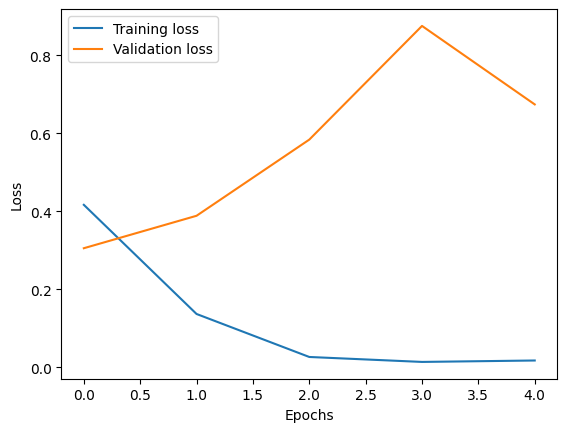

In [24]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

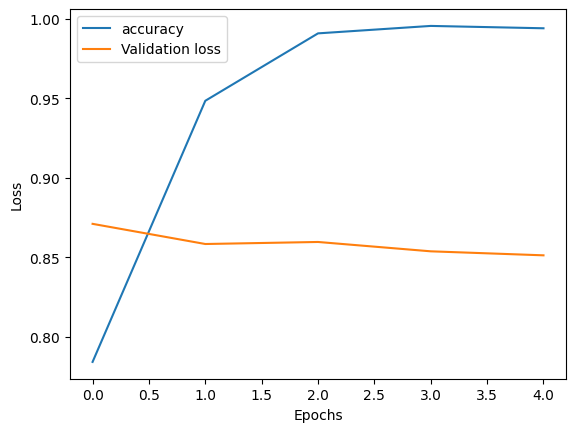

In [25]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()